In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

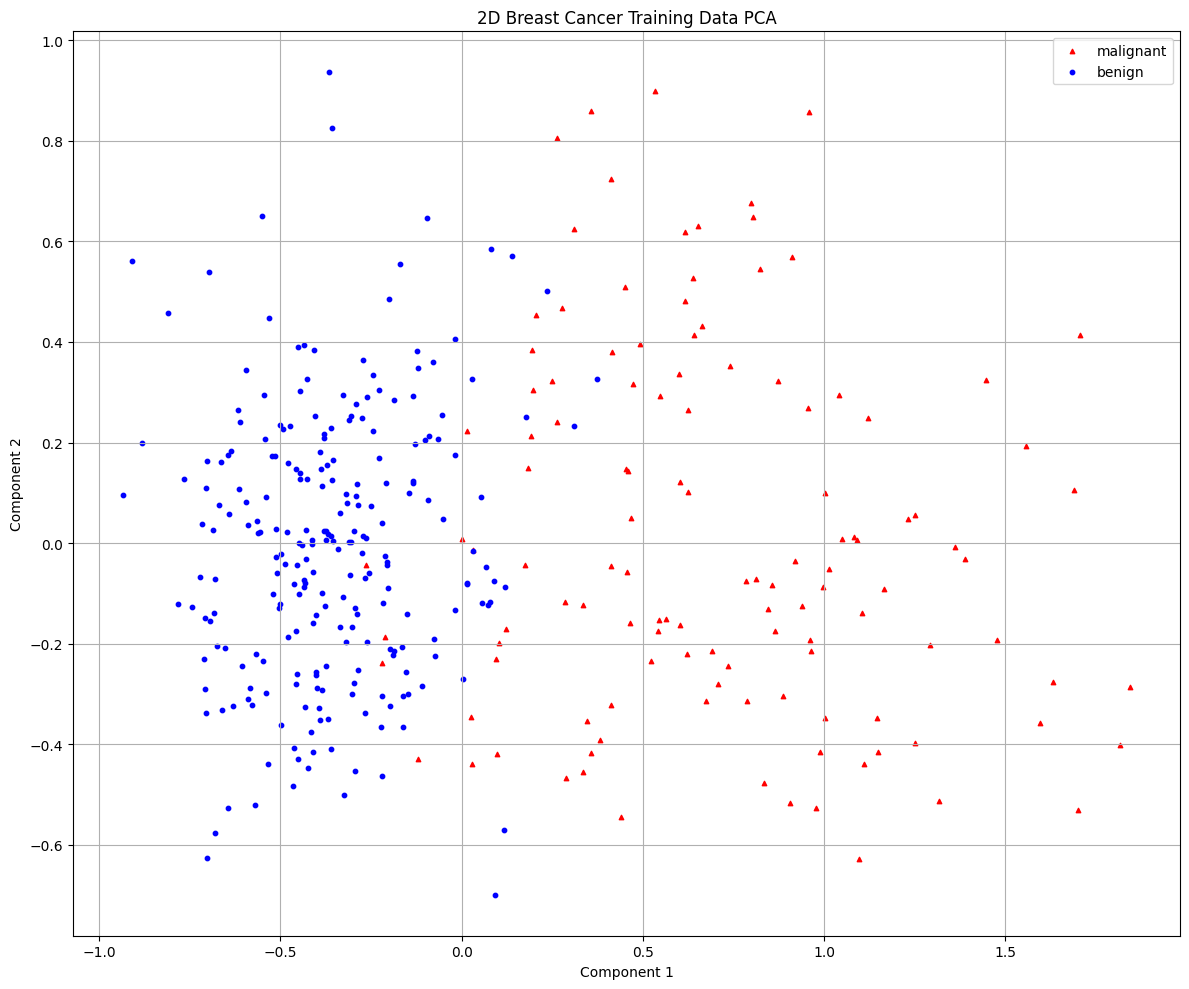

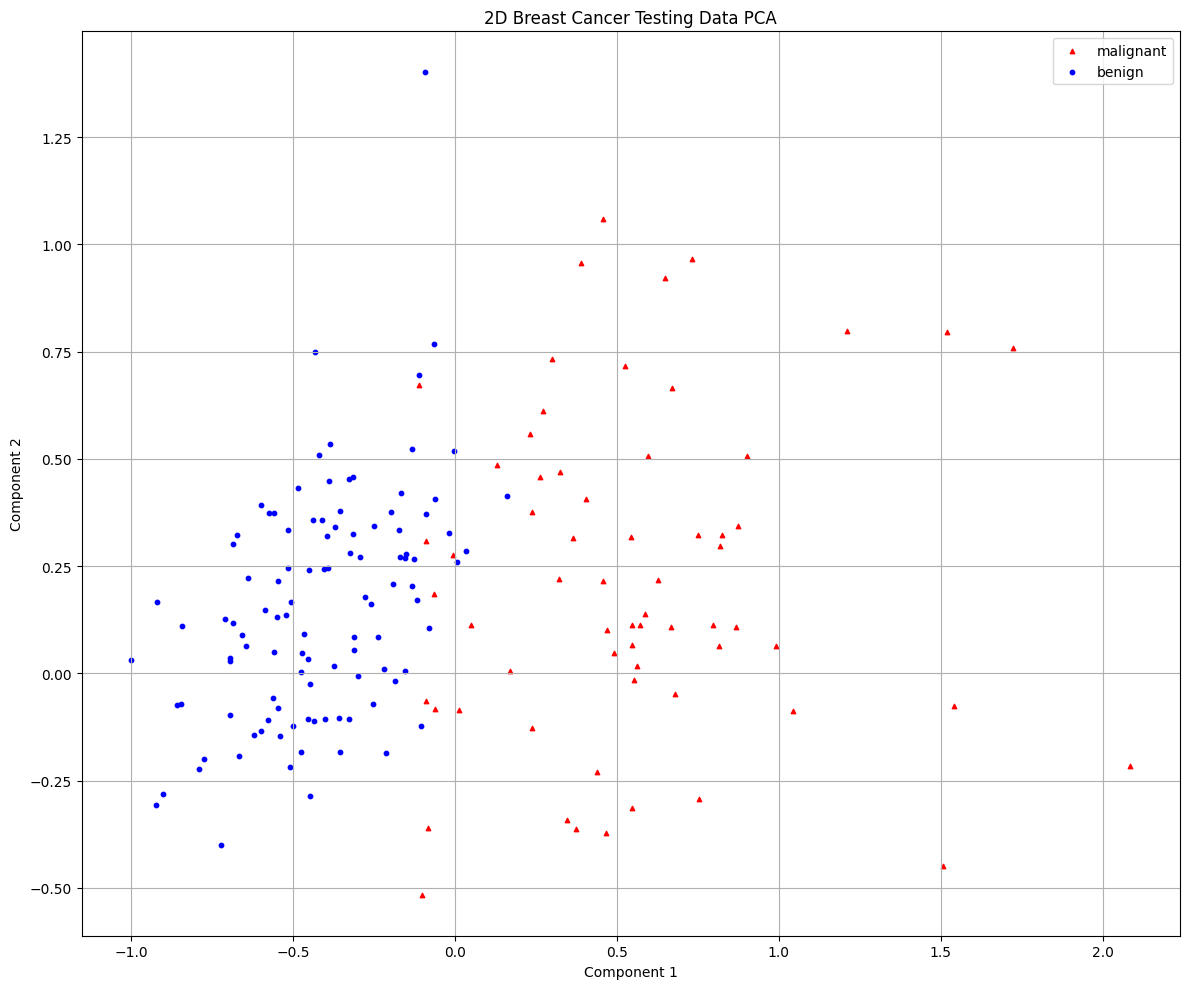

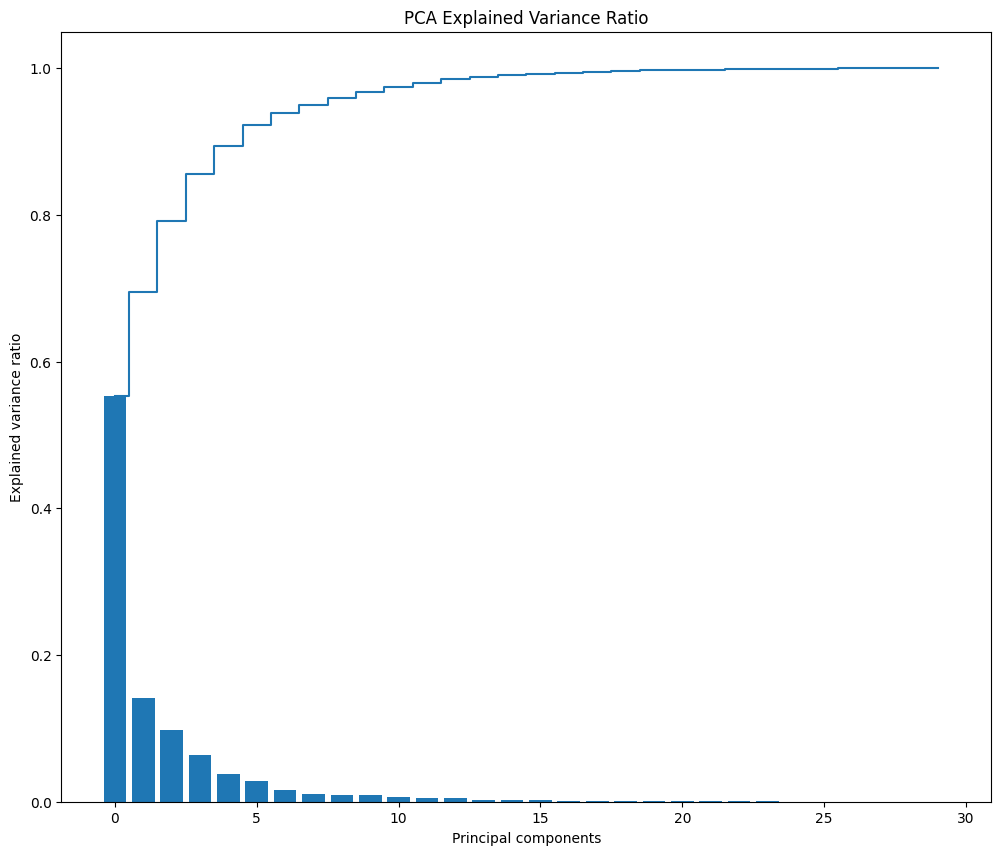

In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

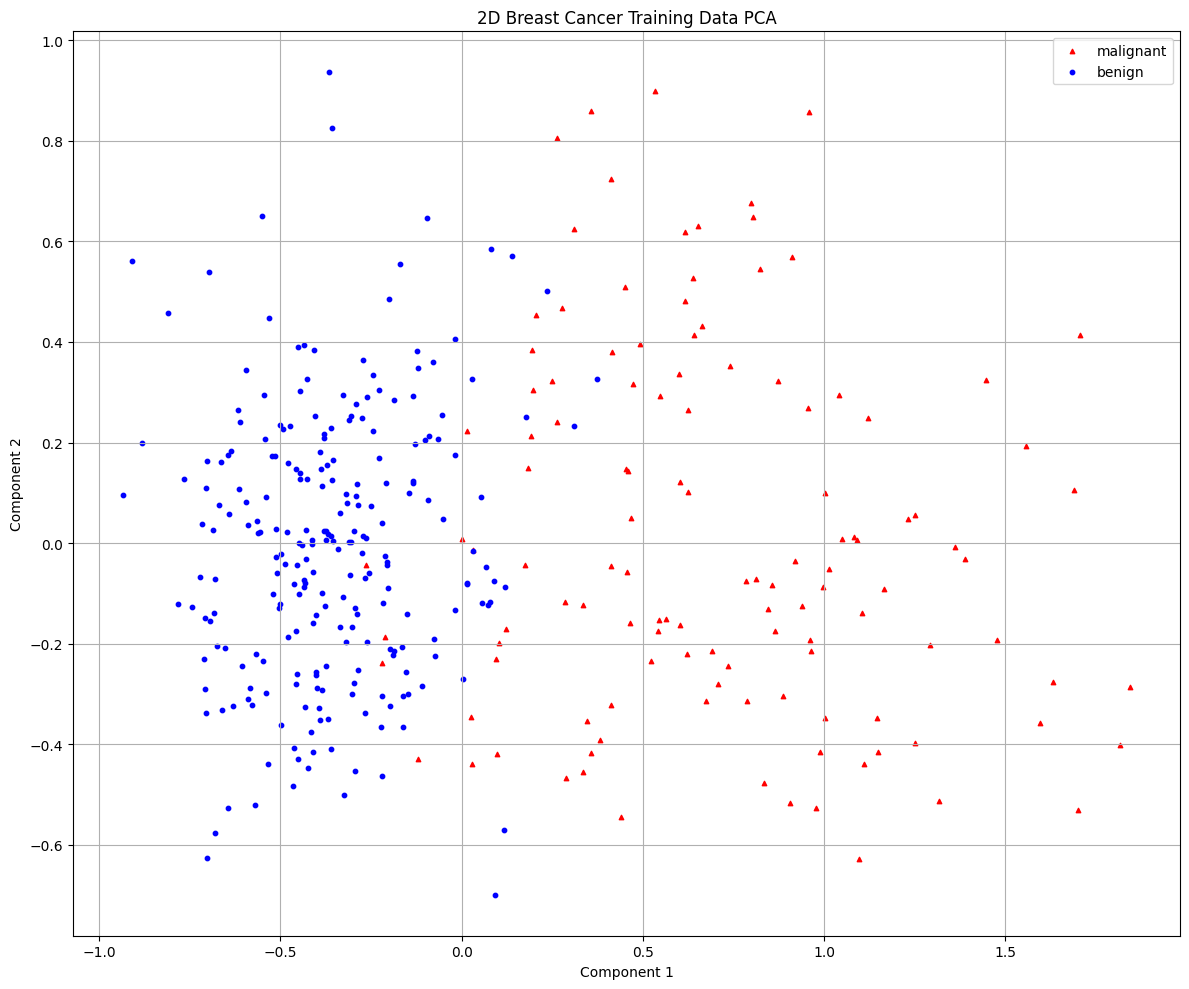

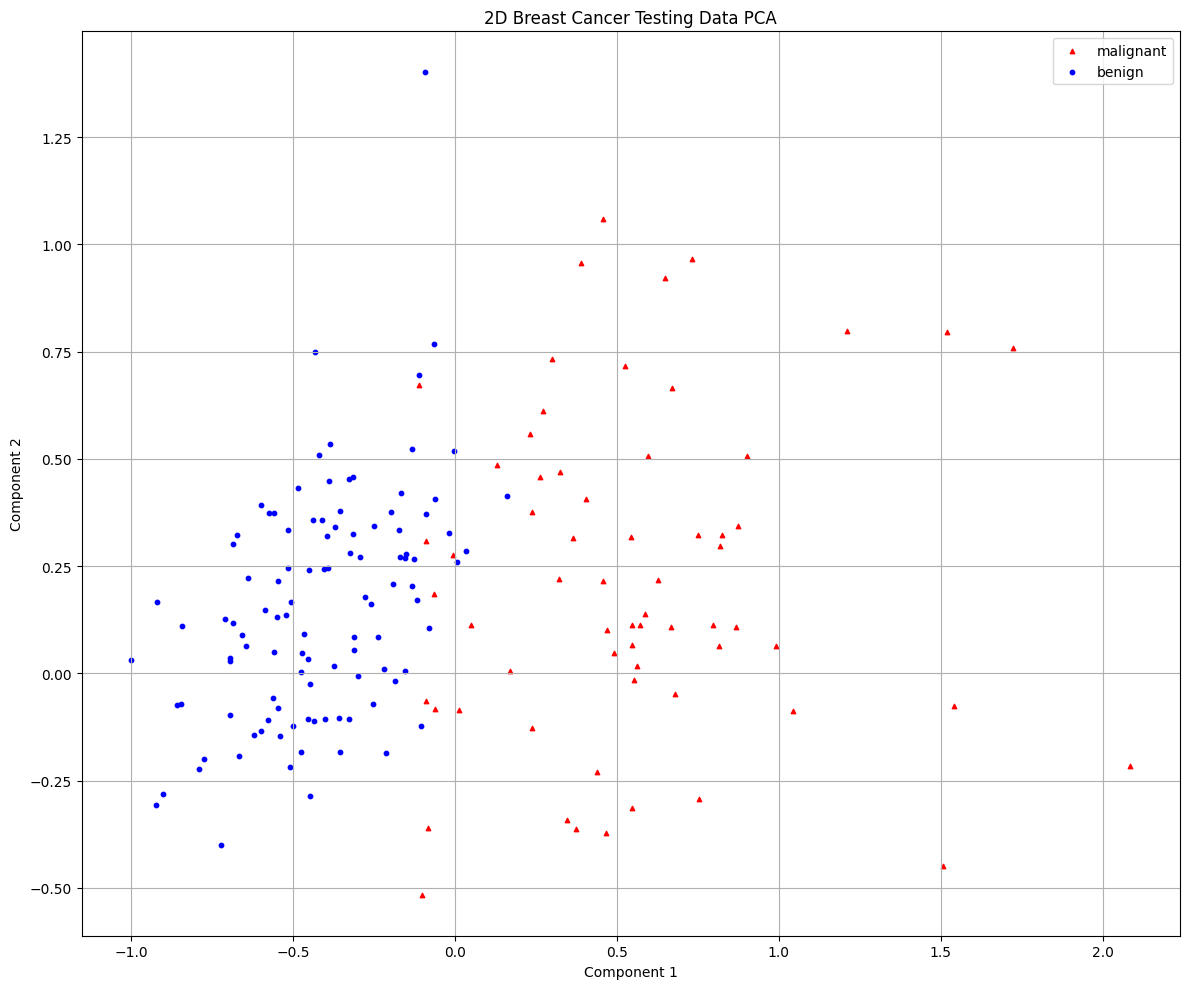

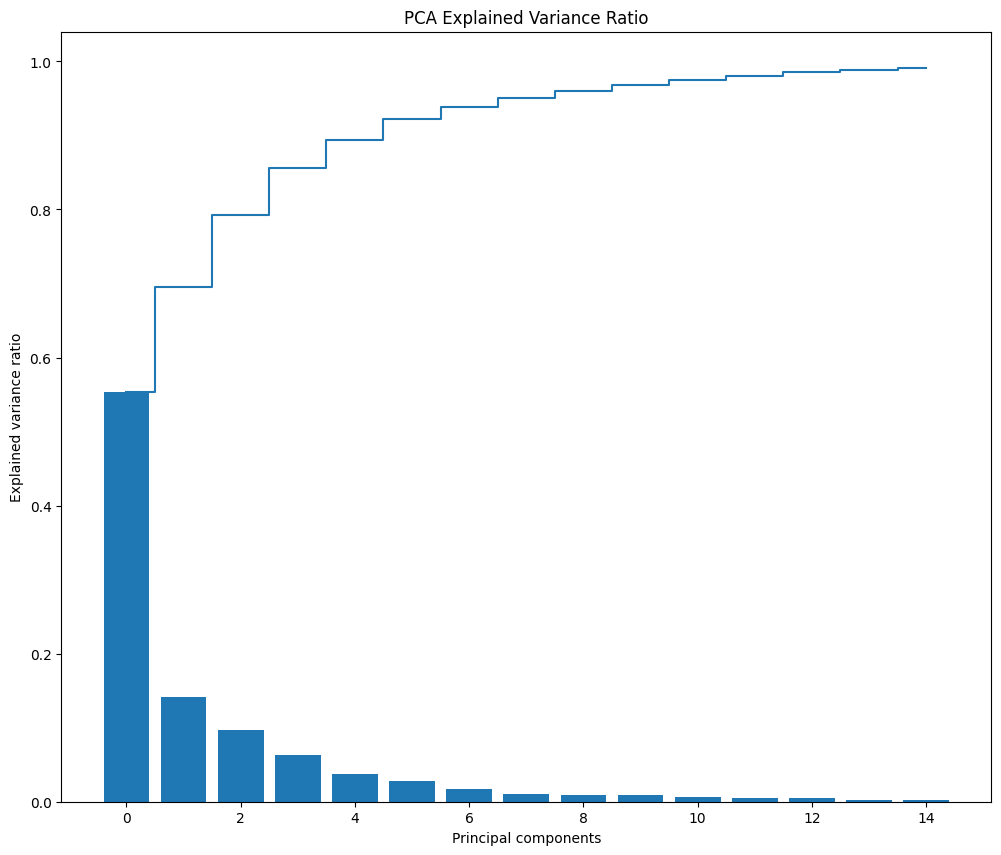

[I 2025-04-27 11:21:43,348] A new study created in memory with name: no-name-34140319-0e05-41b7-bbb5-bf80a1411097
[I 2025-04-27 11:21:43,365] Trial 0 finished with value: 0.9667808219178082 and parameters: {'C': 30.97321863322594, 'kernel': 'linear', 'max_iter': 4581}. Best is trial 0 with value: 0.9667808219178082.
[I 2025-04-27 11:21:43,392] Trial 1 finished with value: 0.9474124809741248 and parameters: {'C': 0.5809623286790416, 'kernel': 'rbf', 'gamma': 0.05505842939138178, 'max_iter': 6379}. Best is trial 0 with value: 0.9667808219178082.
[I 2025-04-27 11:21:43,414] Trial 2 finished with value: 0.7044901065449011 and parameters: {'C': 0.007186248141944789, 'kernel': 'linear', 'max_iter': 9378}. Best is trial 0 with value: 0.9667808219178082.
[I 2025-04-27 11:21:43,429] Trial 3 finished with value: 0.9779680365296803 and parameters: {'C': 3.2707535996501096, 'kernel': 'linear', 'max_iter': 8258}. Best is trial 3 with value: 0.9779680365296803.
/opt/homebrew/anaconda3/envs/pyml/lib/

Best trial:
Accuracy: 0.9834474885844748
Best hyperparameters:  {'C': 1.97006455339098, 'kernel': 'linear', 'max_iter': 894}


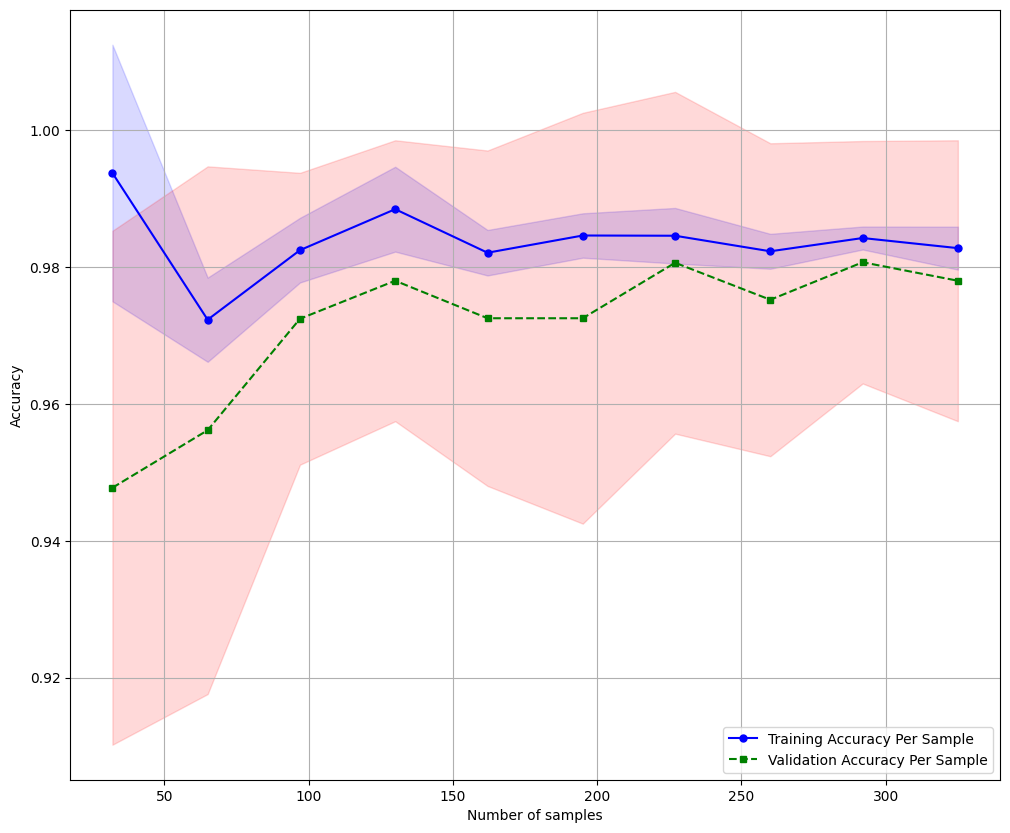

Confusion Matrix
[[ 53  11]
 [  0 107]]
Accuracy: 0.9357, Precision: 0.9068, Recall: 1.0000, F1: 0.9511, AUC: 0.9901


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)